<a href="https://colab.research.google.com/github/Caoyexin/Learning/blob/main/Capstone%20project/capstone%E2%80%94%E2%80%94timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import packages

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline

from datetime import datetime
import pandas as pd
import numpy as np
import pandas_datareader.data as web

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

In [4]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [5]:
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv




# Data Wrangling

## Load dataset

In [6]:
apple_df = pd.read_csv("AAPL.csv")
apple_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100751,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095495,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088485,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090676,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093304,73449600
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.098999,48630400
6,1980-12-22,0.132254,0.132813,0.132254,0.132254,0.103817,37363200
7,1980-12-23,0.137835,0.138393,0.137835,0.137835,0.108198,46950400
8,1980-12-24,0.145089,0.145647,0.145089,0.145089,0.113892,48003200
9,1980-12-26,0.158482,0.159040,0.158482,0.158482,0.124405,55574400


In [7]:
apple_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10250.000000,10250.000000,10250.000000,10250.000000,10250.000000,1.025000e+04
mean,11.711384,11.836625,11.584222,11.715104,11.139873,3.359526e+08
std,24.313667,24.584732,24.037851,24.323067,24.033308,3.405719e+08
min,0.049665,0.049665,0.049107,0.049107,0.038548,0.000000e+00
25%,0.276786,0.283571,0.269375,0.276786,0.232788,1.278900e+08
50%,0.454464,0.462054,0.445804,0.453125,0.377402,2.238824e+08
75%,12.508750,12.629464,12.405535,12.518929,10.765063,4.183368e+08
max,149.240005,150.000000,147.699997,149.149994,149.149994,7.421641e+09


In [8]:
# Change date format
apple_df['Date'] = pd.to_datetime(apple_df['Date'], format='%Y-%m-%d')

In [9]:
# Only take 10 years data for analysis: 2009~2019
df = apple_df[(apple_df['Date']>='2009-01-01') & (apple_df['Date']<='2019-12-31')]
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
9837,2019-12-17,69.892502,70.442497,69.699997,70.102501,69.280899,114158400
9838,2019-12-18,69.949997,70.474998,69.779999,69.934998,69.115349,116028400
9839,2019-12-19,69.875000,70.294998,69.737503,70.004997,69.184532,98369200
9840,2019-12-20,70.557503,70.662498,69.639999,69.860001,69.041237,275978000
9841,2019-12-23,70.132500,71.062500,70.092499,71.000000,70.167885,98572000
9842,2019-12-24,71.172501,71.222504,70.730003,71.067497,70.234581,48478800
9843,2019-12-26,71.205002,72.495003,71.175003,72.477501,71.628067,93121200
9844,2019-12-27,72.779999,73.492500,72.029999,72.449997,71.600876,146266000
9845,2019-12-30,72.364998,73.172501,71.305000,72.879997,72.025833,144114400
9846,2019-12-31,72.482498,73.419998,72.379997,73.412498,72.552094,100805600


In [10]:
# Reset the index
df = df.reset_index(drop=True)
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,3.067143,3.251429,3.041429,3.241071,2.787006,746015200
1,2009-01-05,3.327500,3.435000,3.311071,3.377857,2.904629,1181608400
2,2009-01-06,3.426786,3.470357,3.299643,3.322143,2.856720,1289310400
3,2009-01-07,3.278929,3.303571,3.223571,3.250357,2.794991,753048800
4,2009-01-08,3.229643,3.326786,3.215714,3.310714,2.846893,673500800
5,2009-01-09,3.328929,3.335000,3.219286,3.235000,2.781786,546845600
6,2009-01-12,3.230714,3.249643,3.126786,3.166429,2.722821,617716400
7,2009-01-13,3.151429,3.205000,3.083929,3.132500,2.693645,798397600
8,2009-01-14,3.080000,3.116071,3.025714,3.047500,2.620554,1021664000
9,2009-01-15,2.877500,3.004286,2.858929,2.977857,2.560668,1831634000


In [11]:
# check if there is null value
print('Total NULL values:', df.isnull().sum().sum())

Total NULL values: 0


## Visualize

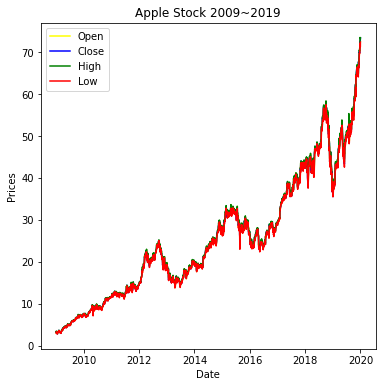

In [12]:
plt.figure(figsize=(6, 6))
color = ['yellow', 'blue', 'green', 'red']
y = ['Open', 'Close' , 'High', 'Low']
for i, c in zip(y, color):
  plt.plot(df['Date'], df[i], color=c, label=f'{i}')
  plt.title('Apple Stock 2009~2019')
  plt.xlabel('Date')
  plt.ylabel('Prices')
  plt.legend()

plt.show()

In [13]:
corr = {'origin':df['High'], 'lag_1': df['High'].shift(1), 'lag_5':df['High'].shift(5), 'lag_10':df['High'].shift(10)}
corr_df = pd.DataFrame(corr)
# corr_df.fillna(0, inplace=True)
corr_df.dropna(inplace=True)
corr_df

,origin,lag_1,lag_5,lag_10
10,3.013571,3.004286,3.335000,3.251429
11,2.928571,3.013571,3.249643,3.435000
12,2.960000,2.928571,3.205000,3.470357
13,3.214286,2.960000,3.116071,3.303571
14,3.209643,3.214286,3.004286,3.326786
...,...,...,...,...
2763,71.222504,71.062500,70.442497,67.517502
2764,72.495003,71.222504,70.474998,67.775002
2765,73.492500,72.495003,70.294998,68.139999
2766,73.172501,73.492500,70.662498,68.824997


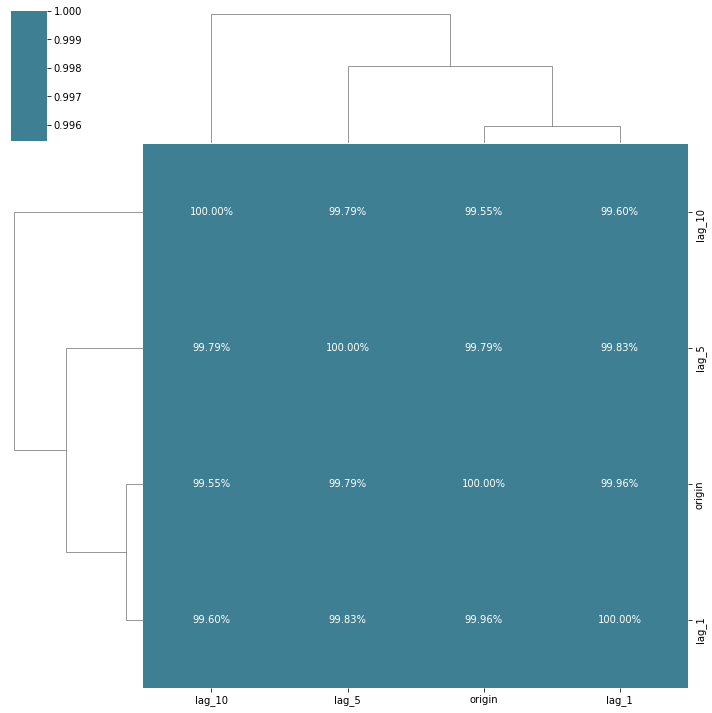

In [14]:
sns.clustermap(corr_df.corr(), cmap=sns.diverging_palette(h_neg=20, h_pos=220), center=0, annot=True, fmt='.2%');

# Split data

In [15]:
split = 0.8
train_data, test_data = df.iloc[0:int(len(df)*split), :], df.iloc[int(len(df)*split):, :]

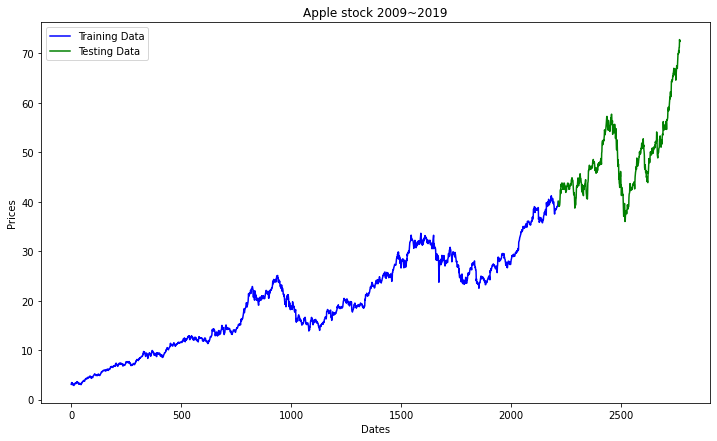

In [16]:
plt.figure(figsize=(12,7))
plt.title('Apple stock 2009~2019')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.legend();


# Model


1.   ARIMA
2.   LSTM



##ARIMA

### Original Data


*   Rolling stats
*   AD-Fuller Stats



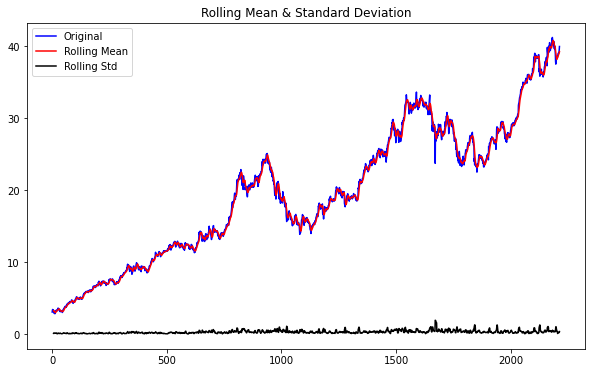

In [17]:
window = 7
train_series = train_data['Open']

#Determing rolling statistics
rolmean = train_series.rolling(window).mean()
rolstd = train_series.rolling(window).std()

#Plot rolling statistics:
fig = plt.figure(figsize=(10, 6))
orig = plt.plot(train_series, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation');

In [18]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(train_series, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                   -0.396155
p-value                           0.910739
#Lags Used                       13.000000
Number of Observations Used    2200.000000
Critical Value (1%)              -3.433326
Critical Value (5%)              -2.862855
Critical Value (10%)             -2.567470
dtype: float64

### Apply 1st order differencing


*   Rolling stats
*   AD-Fuller Stats



In [19]:
train_diff = train_series.diff()
train_diff = train_diff.dropna(inplace = False)
train_diff.head(10)

1     0.260357
2     0.099286
3    -0.147857
4    -0.049286
5     0.099286
6    -0.098215
7    -0.079285
8    -0.071429
9    -0.202500
10    0.133214
Name: Open, dtype: float64

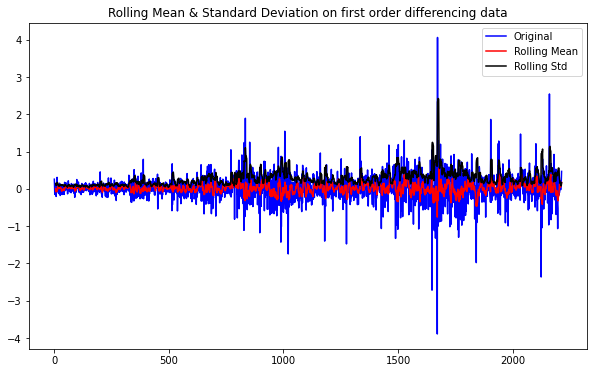

In [20]:
#Determing rolling statistics
diff_rolmean = train_diff.rolling(window).mean()
diff_rolstd = train_diff.rolling(window).std()

#Plot rolling statistics:
fig = plt.figure(figsize=(10, 6))
diff_orig = plt.plot(train_diff, color='blue',label='Original')
diff_mean = plt.plot(diff_rolmean, color='red', label='Rolling Mean')
diff_std = plt.plot(diff_rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation on first order differencing data');

In [21]:
diff_dftest = adfuller(train_diff, autolag='AIC')
diff_dfoutput = pd.Series(diff_dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in diff_dftest[4].items():
    diff_dfoutput['Critical Value (%s)'%key] = value
diff_dfoutput

Test Statistic                -1.226519e+01
p-value                        8.893430e-23
#Lags Used                     1.200000e+01
Number of Observations Used    2.200000e+03
Critical Value (1%)           -3.433326e+00
Critical Value (5%)           -2.862855e+00
Critical Value (10%)          -2.567470e+00
dtype: float64

### Train model

In [22]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [23]:
#test_data.reset_index(drop=True,inplace=True)
test_series = test_data['Open']
test_diff = test_series.diff()
test_diff = test_diff.dropna(inplace = False)
test_diff.head(10)

2215   -0.917500
2216   -0.035000
2217    0.070000
2218   -0.150002
2219    0.155003
2220    0.079998
2221    0.514999
2222    1.150002
2223    1.002498
2224    0.492501
Name: Open, dtype: float64

In [24]:
%%time 

history = [x for x in train_diff]
tmp_params = (5,1,0)

predictions = list()
for t in range(len(test_diff)):
    model = ARIMA(history,order=tmp_params)
    # fit the model
    model_fit = model.fit()

    # use forecast on the fitted model
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)

    obs = test_diff.iloc[t]
    history.append(obs)

    if t % 100 == 0:
      print('Test Series Point: {}\tPredicted={}, Expected={}'.format(t, yhat, obs))

Test Series Point: 0	Predicted=[0.11335539], Expected=-0.9174999999999969


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test Series Point: 100	Predicted=[0.19488646], Expected=-0.45500200000000035
Test Series Point: 200	Predicted=[0.61446696], Expected=0.33000200000000035
Test Series Point: 300	Predicted=[-0.41161106], Expected=0.2575000000000003
Test Series Point: 400	Predicted=[-0.12875444], Expected=0.09999799999999937
Test Series Point: 500	Predicted=[0.38986887], Expected=-0.755001
CPU times: user 7min 4s, sys: 55.9 s, total: 8min
Wall time: 6min 57s


In [25]:
reverse_test_diff = np.r_[test_series.iloc[0], test_diff].cumsum()
reverse_predictions = np.row_stack((test_series.iloc[0], predictions)).cumsum()
reverse_test_diff.shape, reverse_predictions.shape

((554,), (554,))

In [26]:
def smape_kun(y_true, y_pred):
    # START_CODE_HERE
    return np.mean((np.abs(y_pred - y_true) * 200 / (np.abs(y_pred) + np.abs(y_true))))
    # END_CODE_HERE

In [27]:
error = mean_squared_error(reverse_test_diff, reverse_predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(reverse_test_diff, reverse_predictions)
print('Symmetric Mean absolute percentage error: %.3f' % error2)

Testing Mean Squared Error: 2.050
Symmetric Mean absolute percentage error: 2.274


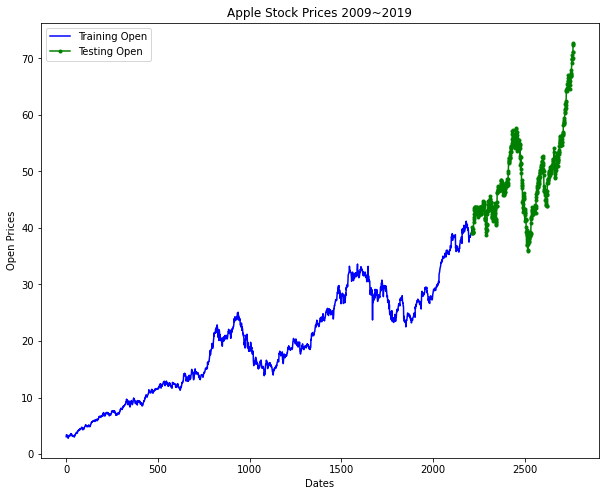

In [28]:
plt.figure(figsize=(12,7))
plt.title('IBM Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_series, color='blue', label='Training Prices')
plt.plot(reverse_test_diff_series, color='green', marker='.', label='Testing Prices - Reverse Diff Transform')
plt.plot(reverse_predictions_series, color='red', linestyle='--', label='Forecasted Prices - Reverse Diff Transform')
plt.legend();